# Import libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

# Import datasets

In [ ]:
#importing dataset
data = pd.read_csv("https://raw.githubusercontent.com/PonPradeep/Machine-Learning/main/train.csv")
data.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,PT7M37S,F
1,VID_14135,2,1707,56,2,6,2016-10-01,PT9M30S,D
2,VID_2187,1,2023,25,0,2,2016-07-02,PT2M16S,C
3,VID_23096,6,620860,777,161,153,2016-07-27,PT4M22S,H
4,VID_10175,1,666,1,0,0,2016-06-29,PT31S,D


# Data Cleaning and Visualization


In [ ]:
data.shape

(14999, 9)

In [ ]:
data.dtypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   vidid      14999 non-null  object
 1   adview     14999 non-null  int64 
 2   views      14999 non-null  object
 3   likes      14999 non-null  object
 4   dislikes   14999 non-null  object
 5   comment    14999 non-null  object
 6   published  14999 non-null  object
 7   duration   14999 non-null  object
 8   category   14999 non-null  object
dtypes: int64(1), object(8)
memory usage: 1.0+ MB


In [ ]:
data.isnull().sum()

vidid        0
adview       0
views        0
likes        0
dislikes     0
comment      0
published    0
duration     0
category     0
dtype: int64

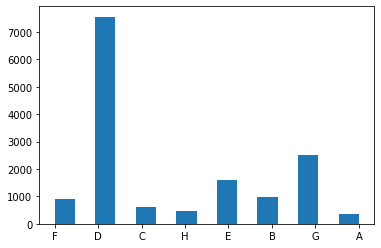

In [ ]:
plt.hist(data['category'],bins=15)
plt.show()

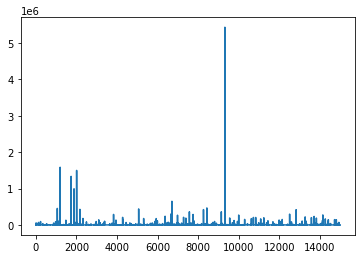

In [ ]:
plt.plot(data['adview'])
plt.show()

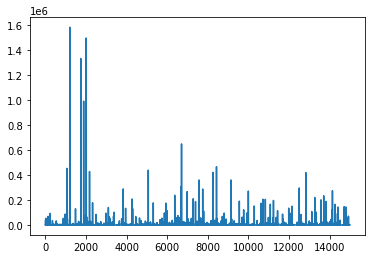

In [ ]:
# removing outliers
data['adview'] = data['adview'][data['adview']<2000000]
plt.plot(data['adview'])

In [ ]:
# Removing value 'F' from the columns
numericals = ['views','likes','dislikes','comment']
data[numericals] = data[numericals][data[numericals]!='F']
data[numericals].head()

,views,likes,dislikes,comment
0,1031602,8523,363,1095
1,1707,56,2,6
2,2023,25,0,2
3,620860,777,161,153
4,666,1,0,0


In [ ]:
# Convert values to integers for views, likes, comments, dislikes and adview
data[numericals] = data[numericals].apply(pd.to_numeric)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   vidid      14999 non-null  object 
 1   adview     14998 non-null  float64
 2   views      14997 non-null  float64
 3   likes      14844 non-null  float64
 4   dislikes   14844 non-null  float64
 5   comment    14766 non-null  float64
 6   published  14999 non-null  object 
 7   duration   14999 non-null  object 
 8   category   14999 non-null  object 
dtypes: float64(5), object(4)
memory usage: 1.0+ MB


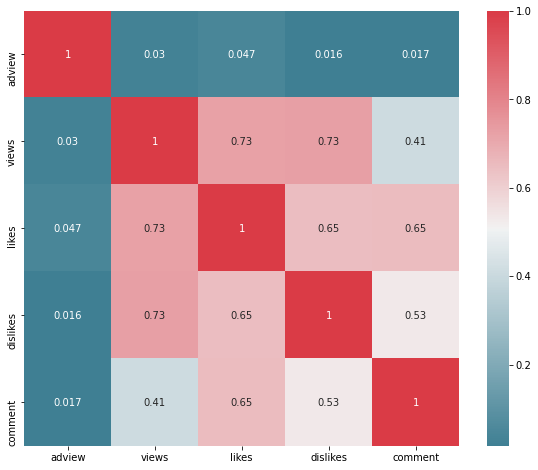

In [ ]:
# Heatmap
f, ax = plt.subplots(figsize=(10, 8))
corr = data.corr()
sn.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sn.diverging_palette(220, 10, as_cmap=True),
           square=True, ax=ax,annot=True)
plt.show()

In [ ]:
column_vidid =data['vidid']
column_vidid

0        VID_18655
1        VID_14135
2         VID_2187
3        VID_23096
4        VID_10175
           ...    
14994       VID_31
14995     VID_5861
14996      VID_805
14997    VID_19843
14998     VID_8534
Name: vidid, Length: 14999, dtype: object

In [ ]:
data['category'].unique(), data['category'].nunique()

(array(['F', 'D', 'C', 'H', 'E', 'B', 'G', 'A'], dtype=object), 8)

In [ ]:
cate = {'A':1, "B":2, "C":3, "D":4, "E":5, "F":6, "G":7, "H":8}
data['category']= data['category'].map(cate)
data['category']

0        6
1        4
2        3
3        8
4        4
        ..
14994    1
14995    4
14996    2
14997    7
14998    4
Name: category, Length: 14999, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
data['vidid']= LabelEncoder().fit_transform(data['vidid'])
data['published']= LabelEncoder().fit_transform(data['published'])
data.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,6078,40.0,1031602.0,8523.0,363.0,1095.0,2170,PT7M37S,6
1,2869,2.0,1707.0,56.0,2.0,6.0,2187,PT9M30S,4
2,8339,1.0,2023.0,25.0,0.0,2.0,2096,PT2M16S,3
3,9215,6.0,620860.0,777.0,161.0,153.0,2121,PT4M22S,8
4,123,1.0,666.0,1.0,0.0,0.0,2093,PT31S,4


In [ ]:
# Convert Time_in_sec for duration
import datetime
import time

def checki(x):
    y = x[2:]
  
    h = ''
    m = ''
    s = ''
    mm = ''
    P = ['H','M','S']
    for i in y:
        if i not in P:
            mm+=i
        else:
            if(i=="H"):
                h = mm
                mm = ''
            elif(i == "M"):
                m = mm
                mm = ''
            else:
                s = mm
                mm = ''
    if(h==''):
        h = '00'
    if(m == ''):
        m = '00'
    if(s==''):
        s='00'
    bp = h+':'+m+':'+s
    return bp

In [ ]:
mp = pd.read_csv("train.csv")["duration"]
time = mp.apply(checki)

def func_sec(time_string):
    h, m, s = time_string.split(':')
    return int(h) * 3600 + int(m) * 60 + int(s)

time1=time.apply(func_sec)

data["duration"]=time1
data.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,6078,40.0,1031602.0,8523.0,363.0,1095.0,2170,457,6
1,2869,2.0,1707.0,56.0,2.0,6.0,2187,570,4
2,8339,1.0,2023.0,25.0,0.0,2.0,2096,136,3
3,9215,6.0,620860.0,777.0,161.0,153.0,2121,262,8
4,123,1.0,666.0,1.0,0.0,0.0,2093,31,4


In [ ]:
data.isnull().sum()

vidid          0
adview         1
views          2
likes        155
dislikes     155
comment      233
published      0
duration       0
category       0
dtype: int64

In [ ]:
data = data.fillna(method='ffill')
data.isnull().sum()

vidid        0
adview       0
views        0
likes        0
dislikes     0
comment      0
published    0
duration     0
category     0
dtype: int64

In [ ]:
# Independent and Dependent variables
y = data['adview']
x = data.drop(columns =['adview','vidid'])
x.head()

,views,likes,dislikes,comment,published,duration,category
0,1031602.0,8523.0,363.0,1095.0,2170,457,6
1,1707.0,56.0,2.0,6.0,2187,570,4
2,2023.0,25.0,0.0,2.0,2096,136,3
3,620860.0,777.0,161.0,153.0,2121,262,8
4,666.0,1.0,0.0,0.0,2093,31,4


In [ ]:
np.any(np.isnan(x))

False

In [ ]:
x[np.isnan(x) == True] = 0

In [ ]:
np.isfinite(x.all())

views        True
likes        True
dislikes     True
comment      True
published    True
duration     True
category     True
dtype: bool

In [ ]:
data.replace([np.inf, -np.inf], np.nan, inplace=True)

In [ ]:
#train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2, random_state=0)
x_train.shape

(11999, 7)

In [ ]:
x_train.mean()

views        694135.186432
likes          2734.863239
dislikes        252.546212
comment         405.098925
published      1554.100425
duration       1041.028252
category          4.602217
dtype: float64

In [ ]:
# Normalise data
from sklearn.preprocessing import MinMaxScaler
mms= MinMaxScaler()
x_train= mms.fit_transform(x_train)
x_test = mms.fit_transform(x_test)

# Model building and testing

In [ ]:
# Evaluation metrics
from sklearn import metrics
from sklearn.metrics import r2_score
def print_error(x_test,y_test,model):
    y_pred= model.predict(x_test)
    print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,y_pred))
    print('Mean Squared Error:',metrics.mean_squared_error(y_test,y_pred))
    print('Root Mean Absolute Error:',np.sqrt(metrics.mean_absolute_error(y_test,y_pred)))
    return metrics.mean_squared_error(y_test,y_pred)

In [ ]:
# Linear Regressor
from sklearn import linear_model
lr = linear_model.LinearRegression()
lr.fit(x_train,y_train)
error1= print_error(x_test, y_test, lr)

Mean Absolute Error: 3473.8757897875075
Mean Squared Error: 332490884.1916346
Root Mean Absolute Error: 58.939594414854156


In [ ]:
# Support vector Regressor
from sklearn.svm import SVR
svr = SVR()
svr = svr.fit(x_train,y_train)
error2= print_error(x_test,y_test,svr)

Mean Absolute Error: 1665.3388179134429
Mean Squared Error: 330858618.51406544
Root Mean Absolute Error: 40.80856304641763


In [ ]:
# Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
decision_tree = DecisionTreeRegressor()
decision_tree.fit(x_train, y_train)
error3= print_error(x_test,y_test, decision_tree)

Mean Absolute Error: 3123.02
Mean Squared Error: 1909893492.934
Root Mean Absolute Error: 55.88398697301401


In [ ]:
# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
n_estimators = 200
max_depth = 25
min_samples_split=15
min_samples_leaf=2
random_forest = RandomForestRegressor(n_estimators = n_estimators, 
                                      max_depth = max_depth, 
                                      min_samples_split=min_samples_split,
                                      min_samples_leaf=min_samples_leaf)
random_forest.fit(x_train,y_train)
error4= print_error(x_test,y_test, random_forest)

Mean Absolute Error: 3318.4532308597695
Mean Squared Error: 438552460.75925833
Root Mean Absolute Error: 57.60601731468484


In [ ]:
min(error1,error2,error3,error4)

330858618.51406544

In [ ]:
#Saving Scikitlearn models
import joblib
joblib.dump(svr, "svr_youtubeadview.pkl")

# Saving Keras Artificial Neural Network model
#ann.save("ann_youtubeadview.h5")

['svr_youtubeadview.pkl']

## Support Vector Machine gives the lowest mean squared error.

# Prediction

In [ ]:
data1 = pd.read_csv('https://raw.githubusercontent.com/PonPradeep/Machine-Learning/main/test.csv')
data1.head()

,vidid,views,likes,dislikes,comment,published,duration,category
0,VID_1054,440238,6153,218,1377,2017-02-18,PT7M29S,B
1,VID_18629,1040132,8171,340,1047,2016-06-28,PT6M29S,F
2,VID_13967,28534,31,11,1,2014-03-10,PT37M54S,D
3,VID_19442,1316715,2284,250,274,2010-06-05,PT9M55S,G
4,VID_770,1893173,2519,225,116,2016-09-03,PT3M8S,B


In [ ]:
data1.shape

(8764, 8)

In [ ]:
data1.isnull().sum()

vidid        0
views        0
likes        0
dislikes     0
comment      0
published    0
duration     0
category     0
dtype: int64

In [ ]:
data1.dtypes

vidid        object
views        object
likes        object
dislikes     object
comment      object
published    object
duration     object
category     object
dtype: object

In [ ]:
# Removing value 'F' from the columns
numericals = ['views','likes','dislikes','comment']
data1[numericals] = data1[numericals][data1[numericals]!='F']
data1[numericals].head()

,views,likes,dislikes,comment
0,440238,6153,218,1377
1,1040132,8171,340,1047
2,28534,31,11,1
3,1316715,2284,250,274
4,1893173,2519,225,116


In [ ]:
data1[numericals] = data1[numericals].apply(pd.to_numeric)
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8764 entries, 0 to 8763
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   vidid      8764 non-null   object 
 1   views      8763 non-null   float64
 2   likes      8676 non-null   float64
 3   dislikes   8676 non-null   float64
 4   comment    8613 non-null   float64
 5   published  8764 non-null   object 
 6   duration   8764 non-null   object 
 7   category   8764 non-null   object 
dtypes: float64(4), object(4)
memory usage: 547.9+ KB


In [ ]:
from sklearn.preprocessing import LabelEncoder

data1['published'] = LabelEncoder().fit_transform(data1['published'])

In [ ]:
data1['category'].unique()

array(['B', 'F', 'D', 'G', 'A', 'E', 'H', 'C'], dtype=object)

In [ ]:
cate = {'A':1, "B":2, "C":3, "D":4, "E":5, "F":6, "G":7, "H":8}
data1['category']= data1['category'].map(cate)
data1.head()

,vidid,views,likes,dislikes,comment,published,duration,category
0,VID_1054,440238.0,6153.0,218.0,1377.0,2055,PT7M29S,2
1,VID_18629,1040132.0,8171.0,340.0,1047.0,1827,PT6M29S,6
2,VID_13967,28534.0,31.0,11.0,1.0,1010,PT37M54S,4
3,VID_19442,1316715.0,2284.0,250.0,274.0,117,PT9M55S,7
4,VID_770,1893173.0,2519.0,225.0,116.0,1894,PT3M8S,2


In [ ]:
# Convert Time_in_sec for duration
import datetime
import time

def checki(x):
    y = x[2:]
  
    h = ''
    m = ''
    s = ''
    mm = ''
    P = ['H','M','S']
    for i in y:
        if i not in P:
            mm+=i
        else:
            if(i=="H"):
                h = mm
                mm = ''
            elif(i == "M"):
                m = mm
                mm = ''
            else:
                s = mm
                mm = ''
    if(h==''):
        h = '00'
    if(m == ''):
        m = '00'
    if(s==''):
        s='00'
    bp = h+':'+m+':'+s
    return bp

In [ ]:
mp = pd.read_csv("test.csv")["duration"]
time = mp.apply(checki)

def func_sec(time_string):
    h, m, s = time_string.split(':')
    return int(h) * 3600 + int(m) * 60 + int(s)

time1=time.apply(func_sec)

data1["duration"]=time1
data1.head()

,vidid,views,likes,dislikes,comment,published,duration,category
0,VID_1054,440238.0,6153.0,218.0,1377.0,2055,449,2
1,VID_18629,1040132.0,8171.0,340.0,1047.0,1827,389,6
2,VID_13967,28534.0,31.0,11.0,1.0,1010,2274,4
3,VID_19442,1316715.0,2284.0,250.0,274.0,117,595,7
4,VID_770,1893173.0,2519.0,225.0,116.0,1894,188,2


In [ ]:
data1.isnull().sum()

vidid          0
views          1
likes         88
dislikes      88
comment      151
published      0
duration       0
category       0
dtype: int64

In [ ]:
data1 = data1.fillna(method='ffill')
data1.isnull().sum()

vidid        0
views        0
likes        0
dislikes     0
comment      0
published    0
duration     0
category     0
dtype: int64

In [ ]:
np.isfinite(data1.all==True)

True

In [ ]:
data1.head()

,vidid,views,likes,dislikes,comment,published,duration,category
0,VID_1054,440238.0,6153.0,218.0,1377.0,2055,449,2
1,VID_18629,1040132.0,8171.0,340.0,1047.0,1827,389,6
2,VID_13967,28534.0,31.0,11.0,1.0,1010,2274,4
3,VID_19442,1316715.0,2284.0,250.0,274.0,117,595,7
4,VID_770,1893173.0,2519.0,225.0,116.0,1894,188,2


In [ ]:
data1.drop(columns='vidid',inplace = True)
data1.head()

,views,likes,dislikes,comment,published,duration,category
0,440238.0,6153.0,218.0,1377.0,2055,449,2
1,1040132.0,8171.0,340.0,1047.0,1827,389,6
2,28534.0,31.0,11.0,1.0,1010,2274,4
3,1316715.0,2284.0,250.0,274.0,117,595,7
4,1893173.0,2519.0,225.0,116.0,1894,188,2


In [ ]:
#Normalise
data1 = mms.fit_transform(data1)

In [ ]:
model=joblib.load("svr_youtubeadview.pkl")

In [ ]:
prediction = model.predict(data1)
prediction

array([2.49660334, 2.37015998, 2.09759916, ..., 2.77413092, 1.87238574,
       1.95875675])

In [ ]:
prediction= np.ceil(prediction)
prediction

array([3., 3., 3., ..., 3., 2., 2.])

In [ ]:
np.savetxt("predictions.csv", prediction, delimiter=",")